In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import default_rng
from lmfit.models import SineModel
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
TagTable = {
    'Tag1' : 'E200 420D 49E0 6014 04E6 318A',
    'GTag' : 'E200 470F 45D0 6023 A129 010E'
}

In [3]:
c = 2.998e8 #光の速度
f = 920.4e6 #周波数
wavelength = c / f * 100
print(wavelength)

32.57279443720122


In [4]:
RSSI0 = -63.0

In [5]:
rfiddf=pd.read_csv('results2.csv')
data_size = len(rfiddf)
rfiddf.head()

,Tag ID,RSSI,Phase,Frequency,Antenna No,Created At
0,9990 1912 9990 9990 9990 0139,-61.5,3.761321,920.4,1,12/5/2022 6:04:36 PM
1,9990 1912 9990 9990 9990 0100,-64.0,5.718680,920.4,1,12/5/2022 6:04:36 PM
2,9990 1912 9990 9990 9990 0122,-61.0,2.135301,920.4,1,12/5/2022 6:04:36 PM
3,9990 1912 9990 9990 9990 0098,-55.0,2.515728,920.4,1,12/5/2022 6:04:36 PM
4,9990 1912 9990 9990 9990 0113,-59.0,1.619884,920.4,1,12/5/2022 6:04:36 PM


In [6]:
rfiddf.describe()

,RSSI,Phase,Frequency,Antenna No
count,510.000000,510.000000,5.100000e+02,510.0
mean,-51.240196,3.446831,9.204000e+02,1.0
std,8.669417,2.506872,2.275969e-13,0.0
min,-69.000000,0.000000,9.204000e+02,1.0
25%,-58.000000,0.742447,9.204000e+02,1.0
50%,-54.500000,3.911651,9.204000e+02,1.0
75%,-43.000000,6.092972,9.204000e+02,1.0
max,-34.500000,6.277049,9.204000e+02,1.0


In [7]:
rfiddf.loc[1]

Tag ID        9990 1912 9990 9990 9990 0100
RSSI                                  -64.0
Phase                               5.71868
Frequency                             920.4
Antenna No                                1
Created At             12/5/2022 6:04:36 PM
Name: 1, dtype: object

In [8]:
columns = ['Distance', 'RSSI', 'Phase']
data = np.empty((0,3))
for i in range(1, int(data_size)+1):
    data = np.append(
        data,
        [[i*5, rfiddf['RSSI'][i-1], rfiddf['Phase'][i-1]]],
        axis=0
    )
    
rfiddf2 = pd.DataFrame(
    columns=columns,
    data=data
)
rfiddf2.head(40)

,Distance,RSSI,Phase
0,5.0,-61.5,3.761321
1,10.0,-64.0,5.718680
2,15.0,-61.0,2.135301
3,20.0,-55.0,2.515728
4,25.0,-59.0,1.619884
5,30.0,-51.5,1.264000
6,35.0,-60.5,4.086525
7,40.0,-50.5,3.245903
8,45.0,-60.0,5.553010
9,50.0,-69.0,1.405126


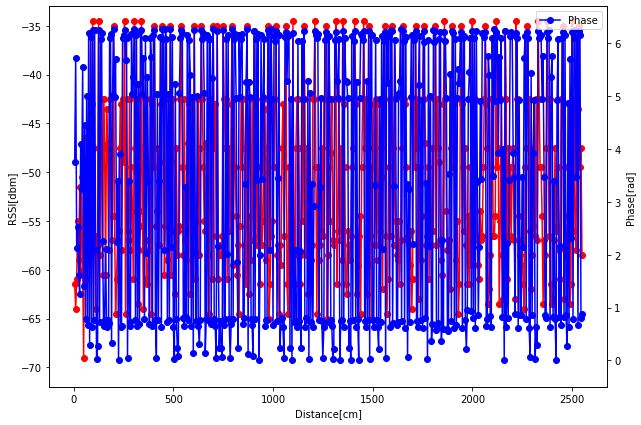

In [9]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
ax1.set_xlabel('Distance[cm]')
ax1.set_ylim(-72,-33)
ax1.set_ylabel('RSSI[dbm]')
ax2.set_ylim(-0.5,6.7)
ax2.set_ylabel('Phase[rad]')
ax1.plot(rfiddf2['Distance'], rfiddf2['RSSI'], label="RSSI", color='red',  marker="o")
ax2.plot(rfiddf2['Distance'], rfiddf2['Phase'], label="Phase", color='blue',  marker='o')
plt.legend()
plt.show()

In [10]:
distance_data = np.empty((0,2))
columns = ['Real_Distance', 'Measured_Distance']
for i in range(0, int(data_size)):
    value = rfiddf2['RSSI'][i]
    distance_data = np.append(
        distance_data,
        [[(i+1)*5, pow(10, (RSSI0 - value)/20) * 100]],
        axis=0
    )
distance = pd.DataFrame(
    data=distance_data,
    columns=columns,
    )

distance.head(15)

,Real_Distance,Measured_Distance
0,5.0,141.253754
1,10.0,188.364909
2,15.0,133.352143
3,20.0,66.834392
4,25.0,105.925373
5,30.0,44.668359
6,35.0,125.892541
7,40.0,39.810717
8,45.0,118.850223
9,50.0,334.965439


best-fit parameters = [-1.78584066e-03  6.78208130e+01]
covariance = 
[[ 1.03302519e-05 -1.31968968e-02]
 [-1.31968968e-02  2.24567193e+01]]


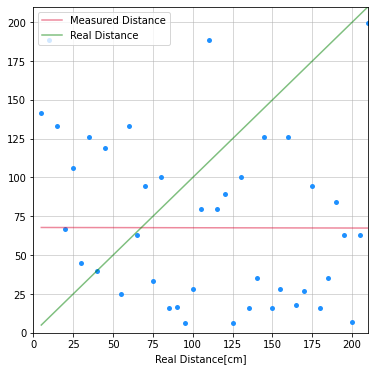

In [11]:
def fit_func_RSSI(x, a, b):
    return a*x + b

distance_format = distance.dropna()

x=distance_format['Real_Distance']
y=distance_format['Measured_Distance']

popt, pcov = curve_fit(fit_func_RSSI, x, y, p0=(1, 0))
print(f"best-fit parameters = {popt}")
print(f"covariance = \n{pcov}")

fig, p = plt.subplots(1, 1, sharex=True, figsize=(6,6))

p.plot(x, y, "o", markersize=5, markerfacecolor="dodgerblue", markeredgewidth=0.0, fillstyle="full")
p.plot(x, fit_func_RSSI(np.array(x), *popt), alpha=0.5, color="crimson", label='Measured Distance')
p.plot(x, x, alpha=0.5, color="green", label='Real Distance')
p.set_xlabel('Real Distance[cm]')
p.set_xlim(0,210)
p.set_ylim(0,210)
p.grid(linewidth=0.5)
p.legend()

In [12]:
Measured_Sin = pd.DataFrame(
    data={
        'Distance' : list(range(1, 201, 5)),
        'phase' : rfiddf2['Phase'],
        'sin(phase)' : np.sin(rfiddf2['Phase']),
        'default_sin' : np.sin((4*np.pi*rfiddf2['Distance']/32.57)%(2*np.pi))
        }
)

ValueError: array length 40 does not match index length 510

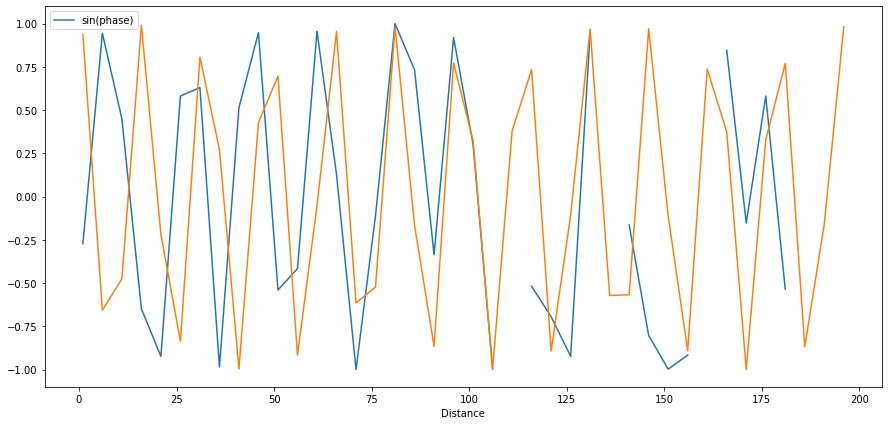

In [ ]:
ax = Measured_Sin.plot(x='Distance', y='sin(phase)', figsize=(15,7))
ax.plot(Measured_Sin['Distance'], Measured_Sin['default_sin'])
plt.legend()
plt.show()

best-fit parameters = [30.90339812]
covariance = 
[[0.02993388]]


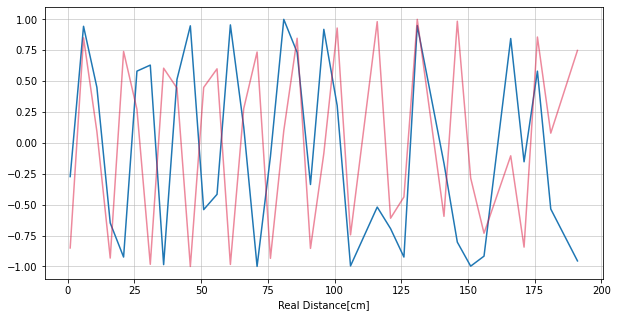

In [ ]:
def fit_func_Phase(x, a):
    return np.sin(((4 * np.pi * x) / a + 4.86) % (2 * np.pi))

Measured_Sin_format = Measured_Sin.dropna()

x=Measured_Sin_format['Distance']
y=Measured_Sin_format['sin(phase)']

popt, pcov = curve_fit(fit_func_Phase, x, y, p0=(32.57))
print(f"best-fit parameters = {popt}")
print(f"covariance = \n{pcov}")

fig, p = plt.subplots(1, 1, sharex=True, figsize=(10,5))

p.plot(Measured_Sin_format['Distance'], Measured_Sin_format['sin(phase)'], markersize=5, markerfacecolor="dodgerblue", markeredgewidth=0.0, fillstyle="full", label="Real Sin")
p.plot(x, fit_func_Phase(np.array(x), *popt), alpha=0.5, color="crimson",label="fitted Sin")
p.set_xlabel('Real Distance[cm]')
p.grid(linewidth=0.5)

In [ ]:
def getWaveBlockFromRSSI (RSSI, wave_base) :
    if(math.isnan(RSSI)) :
        return math.nan
    else :
        wave_number = math.floor((pow(10, (RSSI0 - RSSI) / 20) * 100 - wave_base) / (wavelength / 2)) 
        return wave_number

def getDistanceFromRSSIPhase (RSSI, Phase, wave_base) :
    if(math.isnan(RSSI)) :
        return math.nan
    else :
        wave_number = getWaveBlockFromRSSI(RSSI, wave_base)
        return (wave_number + 1 - Phase / (2 * np.pi)) * (wavelength / 2) + wave_base

def getWaveBlockFromDistance (realDistance, Phase, wave_base) : 
    if(math.isnan(Phase)) :
        return math.nan
    else :
        wave_number = math.floor((realDistance - wave_base) / (wavelength / 2)) 
        return wave_number

def getDistanceFromPhase (realDistance, Phase, wave_base) : 
    if(math.isnan(Phase)) :
        return math.nan
    else :
        wave_number = getWaveBlockFromDistance(realDistance, Phase, wave_base)
        return (wave_number + 1 - Phase / (2 * np.pi)) * (wavelength / 2) + wave_base

In [ ]:
columns = ['Distance', 'RSSI', 'Phase', 'Distance_from_RSSI_Phase', 'Distance_from_Phase', 'Real wave block', 'RSSI wave block']
data = np.empty((0,7))
phase_base = rfiddf['Phase'][0]
wave_base = (1 - phase_base / (2 * np.pi) ) * (wavelength / 2)
for i in range(1, int(data_size)+1):
    RSSIvalue = rfiddf2['RSSI'][i-1]
    Phasevalue = rfiddf2['Phase'][i-1]
    wave_number_from_RSSI = getWaveBlockFromRSSI(RSSIvalue, wave_base) * wavelength / 2 + wave_base
    wave_number_from_real = getWaveBlockFromDistance(i*5, Phasevalue, wave_base) * wavelength / 2  + wave_base
    data = np.append(
        data,
        [[i*5, RSSIvalue, Phasevalue, getDistanceFromRSSIPhase(RSSIvalue, Phasevalue, wave_base), getDistanceFromPhase(i*5, Phasevalue, wave_base), \
            wave_number_from_real , wave_number_from_RSSI]],
        axis=0
    )

new_distance = pd.DataFrame(
    data=data,
    columns=columns,
    )
new_distance.head(20)

,Distance,RSSI,Phase,Distance_from_RSSI_Phase,Distance_from_Phase,Real wave block,RSSI wave block
0,5.0,-40.5,3.417709,14.854976,-1.431422,-8.858909,7.427488
1,10.0,-40.0,1.908272,2.481131,18.767528,7.427488,-8.858909
2,15.0,-40.5,0.466330,22.505129,22.505129,7.427488,7.427488
3,20.0,-43.0,5.577554,9.256527,9.256527,7.427488,7.427488
4,25.0,-45.0,4.319690,12.516987,28.803384,23.713885,7.427488
5,30.0,-47.0,2.521864,17.177060,33.463457,23.713885,7.427488
6,35.0,-50.0,0.681087,21.948465,38.234862,23.713885,7.427488
7,40.0,-53.0,4.540583,28.230815,28.230815,23.713885,23.713885
8,45.0,-51.5,2.601631,33.256696,49.543093,40.000282,23.713885
9,50.0,-51.5,1.245592,36.771631,53.058028,40.000282,23.713885


best-fit parameters = [ 1.07067795 -8.548332  ]
covariance = 
[[ 8.89934266e-03 -8.36538211e-01]
 [-8.36538211e-01  1.06118303e+02]]


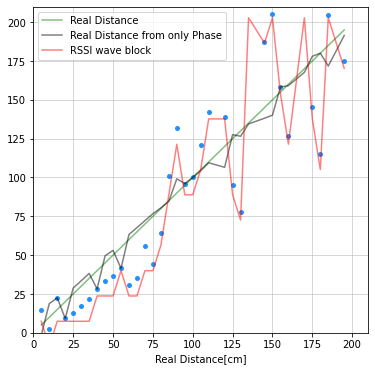

In [ ]:
def fit_func_RSSI_Phase(x, a, b):
    return a*x + b

new_distance_format = new_distance.dropna()
x = new_distance_format['Distance']
y = new_distance_format['Distance_from_RSSI_Phase']
z = new_distance_format['Distance_from_Phase']
a = new_distance_format['Real wave block']
b = new_distance_format['RSSI wave block']

popt, pcov = curve_fit(fit_func_RSSI_Phase, x, y, p0=(1, 0))
print(f"best-fit parameters = {popt}")
print(f"covariance = \n{pcov}")

fig, p = plt.subplots(1, 1, sharex=True, figsize=(6,6))

p.plot(x, y, "o", markersize=5, markerfacecolor="dodgerblue", markeredgewidth=0.0, fillstyle="full")
# p.plot(x, fit_func_RSSI_Phase(np.array(x), *popt), alpha=0.5, color="crimson", label='Measured Distance')
p.plot(x, x, alpha=0.5, color="green", label='Real Distance')
p.plot(x, z, alpha=0.5, color="black", label='Real Distance from only Phase')
# p.plot(x, a, alpha=0.5, color="orange", label='Real wave block')
p.plot(x, b, alpha=0.5, color="red", label='RSSI wave block')
p.set_xlabel('Real Distance[cm]')
p.set_xlim(0,210)
p.set_ylim(0,210)
p.grid(linewidth=0.5)
p.legend()